In [1]:
%pylab inline

import pandas as pd
import spacepy.plot as spp
from scipy import stats
spp.style(look='spacepy')

gold = [5.,5./((1+sqrt(5))/2)]

Populating the interactive namespace from numpy and matplotlib
This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/dolson/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


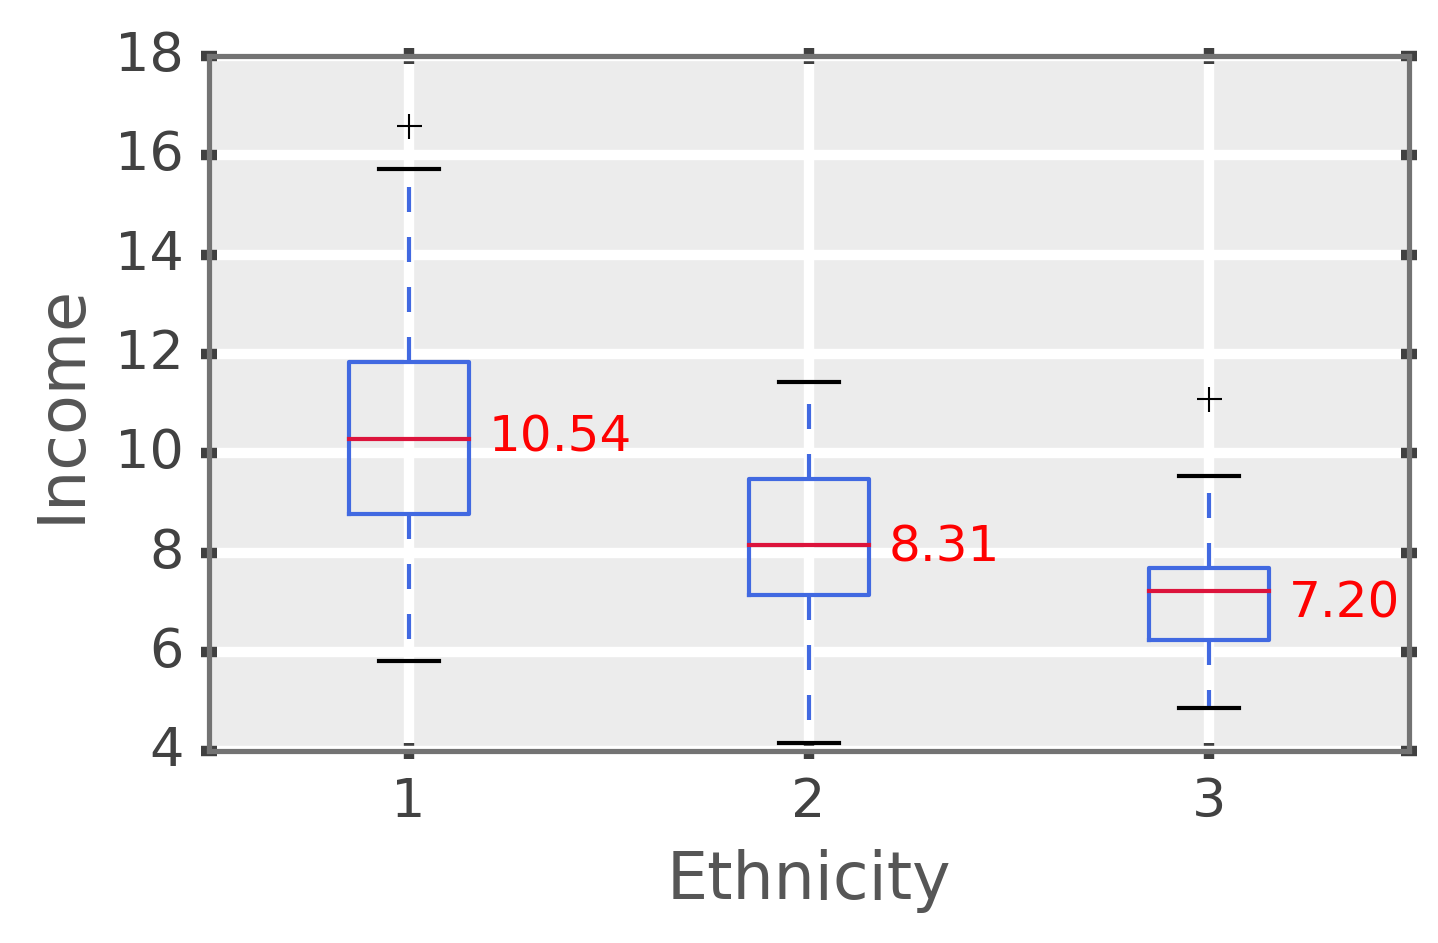

In [2]:
data = pd.read_csv('data_sample.txt')
data.boxplot(column='Income',by='Ethnicity',figsize=gold)
plt.title(''); plt.suptitle('')
gca().set_ylabel("Income")

means = data.groupby(by='Ethnicity')['Income'].mean()
for eth in [1,2,3]:
    text(eth+0.2,means[eth]-0.5,"{0:.2f}".format(means[eth]),color='r',fontsize=12)